# Color Compression with K-Means Algorithm 
#           Nén màu sử dụng thuật toán K-Means

## Import libraries

In [15]:
import numpy as np
import PIL
import matplotlib.pyplot as plt

## Implementations (Cài đặt):

Biến toàn cục:

In [16]:
maxIter = None
clusterType = ['random', 'in_pixels']
stopDistance = 0.000001
fileType = ['.png', '.pdf']

Hàm đọc file ảnh: 

In [17]:
def read_image(name):
    if type(name) != str:
        raise ValueError('Cannot access')
        return
    
    return PIL.Image.open(name)

Chuyển đổi dữ liệu thô từ hình ảnh (tensor 3D) thành tensor 2D để dễ thao tác hơn:

In [18]:
def initialize_color(image):
    colorPoint = np.array(image)
    m, n, p = colorPoint.shape
    colorPoint = np.reshape(colorPoint, (m * n, p))
    
    return colorPoint

Khởi tạo centroid ban đầu bằng các tùy chọn

In [19]:
def initialize_centroids(colorPoint, k_clusters, clusterT):
    if clusterT not in clusterType:
        raise ValueError('Unsure of how to select a cluster')
        
    row, col = colorPoint.shape
    if clusterT == clusterType[0]:
        return np.random.randint(0, 255, (k_clusters, col), dtype = np.intc)
    else:
        return colorPoint[np.random.choice(row, k_clusters, replace=False)]

Sử dụng khoảng cách Euclide để đo khoảng cách giữa các nút trong thuật toán K-means.


In [20]:
def EuclideanDistance(x, y):
    res = np.sqrt((int(y[0]) - int(x[0])) ** 2 + (int(y[1]) - int(x[1])) ** 2)
    return res

Hàm sau đây cập nhật các node labels cho mỗi lần lặp lại của K-mean.

In [21]:
def UpdateLabel(img_1d, centroids):
    labels = [0 for _ in range(img_1d.shape[0])]
    
    for i in range(img_1d.shape[0]):
        minDist = 1000

        for j in range(centroids.shape[0]):
            dist = EuclideanDistance(centroids[j], img_1d[i])
            if(dist < minDist):
                minDist = dist
                labels[i] = j
    
    return np.array(labels)

Hàm bên dưới dùng để cập nhật lại centroid sau khi ghi labels cho các node

In [22]:
def UpdateCentroids(img_1d, centroids, labels):
    for i in range(centroids.shape[0]):
        centroidK = img_1d[labels == i, :]
        if(centroidK.shape[0] != 0 and centroidK.shape[1] != 0):
            mean = np.mean(centroidK, axis = 0)
            centroids[i, :] = mean[:]
    
    return centroids

Thuật toán K-Means

In [23]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    row, col = img_1d.shape
    labels = None
    
    #Initialize centroid
    centroids = initialize_centroids(img_1d, k_clusters, init_centroids)
    
    for _ in range(max_iter):
        labels = UpdateLabel(img_1d, centroids)
        
        oldCentroids = centroids[:]
        centroids = UpdateCentroids(img_1d, centroids, labels)

        if (np.abs(centroids - oldCentroids)).all() < stopDistance:
            break
            
    return centroids, labels

Hàm main

Enter numbers of colors that you want in your image? k? 7
How much loop maximum (to be used for more precise compression) do you require? 100000
Which way do you want to choose compress color? (0: random  /  1: in_pixels): 1
Enter the path to image file: D:\Blabla\Images\nature.jpg
What name of file out? test2
Which type of file out (0: .png  /  1: .pdf): 0
Export successfully!
Time consumming: 22.701936721801758 second


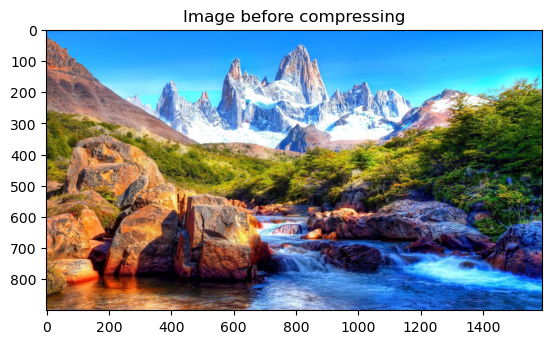

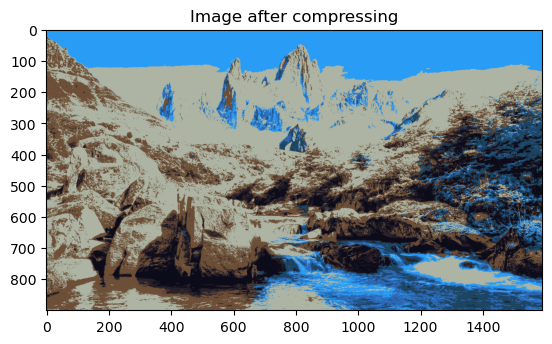

In [42]:
if __name__ ==  "__main__":

    #input parameter
    clusters = int(input('Enter numbers of colors that you want in your image? k? '))
    iterN = int(input('How much loop maximum (to be used for more precise compression) do you require? '))
    clusterT = int(input('Which way do you want to choose compress color? (0: random  /  1: in_pixels): '))
    
    #output parameter
    file = str(input('Enter the path to image file: '))
    nameFileOut = str(input('What name of file out? '))
    fileOutT = int(input("Which type of file out (0: .png  /  1: .pdf): "))
    ima = read_image(file)
    import time
    start_time = time.time()
    plt.figure()
    plt.title('Image before compressing')
    plt.imshow(ima)    
    
    colorPoint = initialize_color(ima)    

    centroids, labels = kmeans(colorPoint, clusters, iterN, clusterType[clusterT])    

    newColorPoint = centroids[labels.astype(int), :]    

    m, n, p = np.array(ima).shape
    newColorPoint = np.reshape(newColorPoint, (m, n, p))
    plt.figure()
    plt.title('Image after compressing')
    plt.imshow(newColorPoint)    

    outImg = PIL.Image.fromarray(newColorPoint.astype('uint8'), 'RGB')

    try:
        outImg.save(nameFileOut + fileType[fileOutT])
    except:
        print('The file out type is incorrect! \n File with compressed images cannot be exported.')
    else:
        print('Export successfully!')
    end_time = time.time()
    run_time = end_time - start_time
    print("Time consumming:", run_time, "second")